In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.backend import clear_session
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = fashion_mnist.load_data()

X_train_org = X_train_org.reshape(-1, 28, 28, 1)
X_test_org = X_test_org.reshape(-1, 28, 28, 1)

X_train_org = X_train_org.astype('float32')
X_test_org = X_test_org.astype('float32')
X_train_org /= 255
X_test_org /= 255

In [ ]:
# 1,2,5,10 conv2d
# 5, 10, 15 epok
# 100, 1000 wag
# 2500, 5000, 10000 sampli, 0.8 ratio

def gen_3a_svm():
    for ratio in np.arange(0.025, 1.0, 0.025):
        train_samples = int(10000 * ratio)
        test_samples = 10000 - train_samples
        X_train, y_train = resample(X_train_org, y_train_org, random_state=0, n_samples=train_samples)
        X_test, y_test = resample(X_test_org, y_test_org, random_state=0, n_samples=test_samples)
        
        svc = SVC(C=5.0, kernel='rbf')
        svc.fit(X_train.reshape(-1, 784), y_train)
        y_pred = svc.predict(X_test.reshape(-1, 784))
        accuracy = accuracy_score(y_test, y_pred)
        print(ratio)
        yield ratio, accuracy, 'SVM'

results_svm = pd.DataFrame(gen_3a_svm(), columns=['ratio', 'accuracy', 'name'])
results_svm.to_csv('3a\\output\\svm.csv')

In [38]:
# results_svm = pd.read_csv('3a\\output\\svm.csv')
# results_3a_1 = pd.read_csv('3a\\output\\cnn_1.csv')
# results_3a_2 = pd.read_csv('3a\\output\\cnn_2.csv')
# results_3a_5 = pd.read_csv('3a\\output\\cnn_5.csv')
# results_3a_10 = pd.read_csv('3a\\output\\cnn_10.csv')

In [56]:
def evaluate_cnn(layers, ratio, epochs):
    train_samples = int(10000 * ratio)
    test_samples = 10000 - train_samples
    X_train, y_train = resample(X_train_org, y_train_org, random_state=0, n_samples=train_samples)
    X_test, y_test = resample(X_test_org, y_test_org, random_state=0, n_samples=test_samples)

    clear_session()
    np.random.seed(0x859)
    tf.random.set_seed(0x859)
    model = Sequential(layers)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return model, accuracy

def gen_3a_cnn(layers, name):
    for ratio in np.arange(0.1, 1.0, 0.1):
        model, accuracy = evaluate_cnn(layers, ratio, 10)
        model.save("3a\\models\\" + name)
        yield ratio, accuracy, name
    
def gen_3b_cnn(layers, name):
    for epochs in range(1, 11):
        model, accuracy = evaluate_cnn(layers, 0.8, epochs)
        model.save("3b\\models\\" + name)
        yield epochs, accuracy, name

def plot_3a(data, filename):
    ax = sns.lmplot(x='ratio', y='accuracy', hue='name', data=data)
    ax.set(xlim=(0.08, 0.92))
    ax.savefig(filename)
    
def plot_3b(data, filename):
    ax = sns.lmplot(x='epochs', y='accuracy', hue='name', data=data)
#     ax.set(xlim=(0.08, 0.92))
    ax.savefig(filename)
    
columns_3a = ['ratio', 'accuracy', 'name']
columns_3b = ['epochs', 'accuracy', 'name']

In [ ]:
model1 = [
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model2 = [
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model5 = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model10 = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

model1_s = [
    Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

model2_s = [
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

model5_s = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

model10_s = [
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(12, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
]

In [ ]:
results_3a_1  = pd.DataFrame(gen_3a_cnn(model1,  'CNN 1'), columns=columns_3a)
results_3a_2  = pd.DataFrame(gen_3a_cnn(model2,  'CNN 2'), columns=columns_3a)
results_3a_5  = pd.DataFrame(gen_3a_cnn(model5,  'CNN 5'), columns=columns_3a)
results_3a_10 = pd.DataFrame(gen_3a_cnn(model10, 'CNN 10'), columns=columns_3a)

concat_3a_1  = pd.concat((results_svm, results_3a_1))
concat_3a_2  = pd.concat((results_svm, results_3a_2))
concat_3a_5  = pd.concat((results_svm, results_3a_5))
concat_3a_10 = pd.concat((results_svm, results_3a_10))
    
plot_3a(concat_3a_1,  '3a/output/cnn_1.svg')
plot_3a(concat_3a_2,  '3a/output/cnn_2.svg')
plot_3a(concat_3a_5,  '3a/output/cnn_5.svg')
plot_3a(concat_3a_10, '3a/output/cnn_10.svg')

results_3a_1.to_csv('3a/output/cnn_1.csv')
results_3a_2.to_csv('3a/output/cnn_2.csv')
results_3a_5.to_csv('3a/output/cnn_5.csv')
results_3a_10.to_csv('3a/output/cnn_10.csv')

In [36]:
results_3a_1_s  = pd.DataFrame(gen_3a_cnn(model1_s,  'CNN 1 S'), columns=columns_3a)
results_3a_2_s  = pd.DataFrame(gen_3a_cnn(model2_s,  'CNN 2 S'), columns=columns_3a)
results_3a_5_s  = pd.DataFrame(gen_3a_cnn(model5_s,  'CNN 5 S'), columns=columns_3a)
results_3a_10_s = pd.DataFrame(gen_3a_cnn(model10_s, 'CNN 10 S'), columns=columns_3a)

concat_3a_1_s  = pd.concat((results_svm, results_3a_1_s))
concat_3a_2_s  = pd.concat((results_svm, results_3a_2_s))
concat_3a_5_s  = pd.concat((results_svm, results_3a_5_s))
concat_3a_10_s = pd.concat((results_svm, results_3a_10_s))
    
plot_3a(concat_3a_1_s,  '3a/output/cnn_1_s.svg')
plot_3a(concat_3a_2_s,  '3a/output/cnn_2_s.svg')
plot_3a(concat_3a_5_s,  '3a/output/cnn_5_s.svg')
plot_3a(concat_3a_10_s, '3a/output/cnn_10_s.svg')

results_3a_1_s.to_csv('3a/output/cnn_1_s.csv')
results_3a_2_s.to_csv('3a/output/cnn_2_s.csv')
results_3a_5_s.to_csv('3a/output/cnn_5_s.csv')
results_3a_10_s.to_csv('3a/output/cnn_10_s.csv')

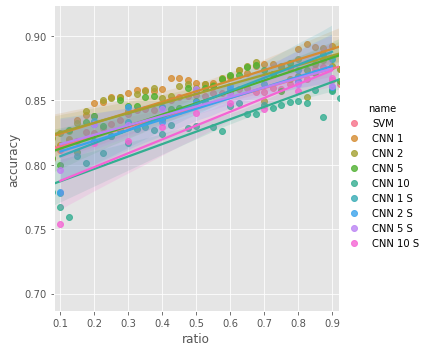

In [39]:
concat_3a_all = pd.concat((
    results_svm,
    results_3a_1,
    results_3a_2,
    results_3a_5,
    results_3a_10,
    results_3a_1_s,
    results_3a_2_s,
    results_3a_5_s,
    results_3a_10_s,
))

plot(concat_3a_all, '3a/output/concat_all.svg')

Train on 8000 samples, validate on 2000 samples
8000/8000 [==============================] - 1s 149us/sample - loss: 0.0053 - accuracy: 0.9987 - val_loss: 1.0857 - val_accuracy: 0.8570
INFO:tensorflow:Assets written to: 3b\models\CNN 1\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 1s 130us/sample - loss: 0.0021 - accuracy: 0.9999 - val_loss: 1.0239 - val_accuracy: 0.8670
Epoch 2/2
8000/8000 [==============================] - 1s 83us/sample - loss: 0.0151 - accuracy: 0.9954 - val_loss: 1.0092 - val_accuracy: 0.8650
INFO:tensorflow:Assets written to: 3b\models\CNN 1\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 1s 144us/sample - loss: 0.0046 - accuracy: 0.9989 - val_loss: 1.0744 - val_accuracy: 0.8615
Epoch 2/3
8000/8000 [==============================] - 1s 94us/sample - loss: 0.0099 - accuracy: 0.9975 - val_loss: 1.0241 - val_accuracy: 0.8705
Epoch 3/3
8000/80

8000/8000 [==============================] - 1s 84us/sample - loss: 2.1693e-04 - accuracy: 1.0000 - val_loss: 1.2696 - val_accuracy: 0.8740
Epoch 5/10
8000/8000 [==============================] - 1s 85us/sample - loss: 1.5211e-04 - accuracy: 1.0000 - val_loss: 1.2755 - val_accuracy: 0.8740
Epoch 6/10
8000/8000 [==============================] - 1s 84us/sample - loss: 1.3026e-04 - accuracy: 1.0000 - val_loss: 1.2798 - val_accuracy: 0.8735
Epoch 7/10
8000/8000 [==============================] - 1s 84us/sample - loss: 1.1497e-04 - accuracy: 1.0000 - val_loss: 1.2853 - val_accuracy: 0.8750
Epoch 8/10
8000/8000 [==============================] - 1s 86us/sample - loss: 1.0385e-04 - accuracy: 1.0000 - val_loss: 1.2874 - val_accuracy: 0.8760
Epoch 9/10
8000/8000 [==============================] - 1s 84us/sample - loss: 9.3285e-05 - accuracy: 1.0000 - val_loss: 1.2953 - val_accuracy: 0.8745
Epoch 10/10
8000/8000 [==============================] - 1s 88us/sample - loss: 8.6382e-05 - accuracy: 1.

Epoch 7/9
8000/8000 [==============================] - 1s 98us/sample - loss: 6.4219e-05 - accuracy: 1.0000 - val_loss: 1.2862 - val_accuracy: 0.8815
Epoch 8/9
8000/8000 [==============================] - 1s 99us/sample - loss: 5.2853e-05 - accuracy: 1.0000 - val_loss: 1.2908 - val_accuracy: 0.8815
Epoch 9/9
8000/8000 [==============================] - 1s 99us/sample - loss: 4.4882e-05 - accuracy: 1.0000 - val_loss: 1.2958 - val_accuracy: 0.8820
INFO:tensorflow:Assets written to: 3b\models\CNN 2\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 154us/sample - loss: 0.0133 - accuracy: 0.9955 - val_loss: 1.4390 - val_accuracy: 0.8730
Epoch 2/10
8000/8000 [==============================] - 1s 99us/sample - loss: 0.0056 - accuracy: 0.9985 - val_loss: 1.3083 - val_accuracy: 0.8780
Epoch 3/10
8000/8000 [==============================] - 1s 101us/sample - loss: 3.7318e-04 - accuracy: 1.0000 - val_loss: 1.3043 - val_accuracy: 0.88

INFO:tensorflow:Assets written to: 3b\models\CNN 5\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/9
8000/8000 [==============================] - 2s 198us/sample - loss: 0.0146 - accuracy: 0.9959 - val_loss: 1.4398 - val_accuracy: 0.8725
Epoch 2/9
8000/8000 [==============================] - 1s 126us/sample - loss: 0.0085 - accuracy: 0.9975 - val_loss: 1.4738 - val_accuracy: 0.8805
Epoch 3/9
8000/8000 [==============================] - 1s 126us/sample - loss: 0.0230 - accuracy: 0.9939 - val_loss: 1.3245 - val_accuracy: 0.8800
Epoch 4/9
8000/8000 [==============================] - 1s 126us/sample - loss: 0.0064 - accuracy: 0.9980 - val_loss: 1.4034 - val_accuracy: 0.8740
Epoch 5/9
8000/8000 [==============================] - 1s 127us/sample - loss: 0.0095 - accuracy: 0.9973 - val_loss: 1.3754 - val_accuracy: 0.8775
Epoch 6/9
8000/8000 [==============================] - 1s 126us/sample - loss: 0.0105 - accuracy: 0.9976 - val_loss: 1.3601 - val_accuracy: 0.8635
Epoch 7/9
80

8000/8000 [==============================] - 1s 170us/sample - loss: 0.0403 - accuracy: 0.9883 - val_loss: 1.0519 - val_accuracy: 0.8630
Epoch 3/8
8000/8000 [==============================] - 1s 170us/sample - loss: 0.0200 - accuracy: 0.9942 - val_loss: 1.1620 - val_accuracy: 0.8645
Epoch 4/8
8000/8000 [==============================] - 1s 170us/sample - loss: 0.0157 - accuracy: 0.9952 - val_loss: 1.2177 - val_accuracy: 0.8650
Epoch 5/8
8000/8000 [==============================] - 1s 172us/sample - loss: 0.0441 - accuracy: 0.9874 - val_loss: 1.0620 - val_accuracy: 0.8680
Epoch 6/8
8000/8000 [==============================] - 1s 172us/sample - loss: 0.0507 - accuracy: 0.9830 - val_loss: 0.8871 - val_accuracy: 0.8635
Epoch 7/8
8000/8000 [==============================] - 1s 173us/sample - loss: 0.0093 - accuracy: 0.9973 - val_loss: 1.1391 - val_accuracy: 0.8640
Epoch 8/8
8000/8000 [==============================] - 1s 171us/sample - loss: 0.0069 - accuracy: 0.9977 - val_loss: 1.1245 - va

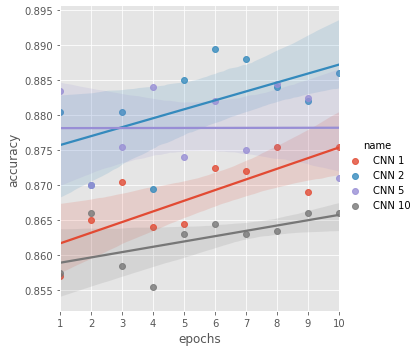

In [57]:
results_3b_1  = pd.DataFrame(gen_3b_cnn(model1,  'CNN 1'), columns=columns_3b)
results_3b_2  = pd.DataFrame(gen_3b_cnn(model2,  'CNN 2'), columns=columns_3b)
results_3b_5  = pd.DataFrame(gen_3b_cnn(model5,  'CNN 5'), columns=columns_3b)
results_3b_10 = pd.DataFrame(gen_3b_cnn(model10, 'CNN 10'), columns=columns_3b)

concat_3b  = pd.concat((results_3b_1, results_3b_2, results_3b_5, results_3b_10))
plot_3b(concat_3b,  '3b/output/cnn.svg')

results_3b_1.to_csv('3b/output/cnn_1.csv')
results_3b_2.to_csv('3b/output/cnn_2.csv')
results_3b_5.to_csv('3b/output/cnn_5.csv')
results_3b_10.to_csv('3b/output/cnn_10.csv')

Train on 8000 samples, validate on 2000 samples
8000/8000 [==============================] - 1s 132us/sample - loss: 0.0071 - accuracy: 0.9977 - val_loss: 1.0752 - val_accuracy: 0.8585
INFO:tensorflow:Assets written to: 3b\models\CNN 1 S\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 1s 163us/sample - loss: 0.0048 - accuracy: 0.9984 - val_loss: 1.0455 - val_accuracy: 0.8735
Epoch 2/2
8000/8000 [==============================] - 1s 83us/sample - loss: 7.7682e-04 - accuracy: 1.0000 - val_loss: 1.0466 - val_accuracy: 0.8750
INFO:tensorflow:Assets written to: 3b\models\CNN 1 S\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 1s 135us/sample - loss: 0.0062 - accuracy: 0.9981 - val_loss: 1.0798 - val_accuracy: 0.8645
Epoch 2/3
8000/8000 [==============================] - 1s 85us/sample - loss: 0.0013 - accuracy: 0.9999 - val_loss: 1.0866 - val_accuracy: 0.8735
Epoch 3/3

8000/8000 [==============================] - 1s 91us/sample - loss: 1.0163e-04 - accuracy: 1.0000 - val_loss: 1.2621 - val_accuracy: 0.8645
Epoch 5/10
8000/8000 [==============================] - 1s 90us/sample - loss: 8.0957e-05 - accuracy: 1.0000 - val_loss: 1.2697 - val_accuracy: 0.8655
Epoch 6/10
8000/8000 [==============================] - 1s 96us/sample - loss: 6.9302e-05 - accuracy: 1.0000 - val_loss: 1.2719 - val_accuracy: 0.8665
Epoch 7/10
8000/8000 [==============================] - 1s 95us/sample - loss: 6.0354e-05 - accuracy: 1.0000 - val_loss: 1.2774 - val_accuracy: 0.8660
Epoch 8/10
8000/8000 [==============================] - 1s 95us/sample - loss: 5.4622e-05 - accuracy: 1.0000 - val_loss: 1.2777 - val_accuracy: 0.8660
Epoch 9/10
8000/8000 [==============================] - 1s 92us/sample - loss: 4.9113e-05 - accuracy: 1.0000 - val_loss: 1.2849 - val_accuracy: 0.8680
Epoch 10/10
8000/8000 [==============================] - 1s 92us/sample - loss: 4.4672e-05 - accuracy: 1.

Epoch 7/9
8000/8000 [==============================] - 1s 97us/sample - loss: 1.9708e-04 - accuracy: 1.0000 - val_loss: 1.3777 - val_accuracy: 0.8775
Epoch 8/9
8000/8000 [==============================] - 1s 97us/sample - loss: 5.4342e-05 - accuracy: 1.0000 - val_loss: 1.3784 - val_accuracy: 0.8775
Epoch 9/9
8000/8000 [==============================] - 1s 102us/sample - loss: 4.0835e-05 - accuracy: 1.0000 - val_loss: 1.3832 - val_accuracy: 0.8775
INFO:tensorflow:Assets written to: 3b\models\CNN 2 S\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 182us/sample - loss: 0.0085 - accuracy: 0.9973 - val_loss: 1.6015 - val_accuracy: 0.8605
Epoch 2/10
8000/8000 [==============================] - 1s 97us/sample - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.5965 - val_accuracy: 0.8640
Epoch 3/10
8000/8000 [==============================] - 1s 98us/sample - loss: 0.0242 - accuracy: 0.9945 - val_loss: 1.4022 - val_accuracy: 0.8615

INFO:tensorflow:Assets written to: 3b\models\CNN 5 S\assets
Train on 8000 samples, validate on 2000 samples
Epoch 1/9
8000/8000 [==============================] - 2s 225us/sample - loss: 0.0128 - accuracy: 0.9951 - val_loss: 2.0210 - val_accuracy: 0.8600
Epoch 2/9
8000/8000 [==============================] - 1s 129us/sample - loss: 0.0104 - accuracy: 0.9969 - val_loss: 1.7851 - val_accuracy: 0.8590
Epoch 3/9
8000/8000 [==============================] - 1s 125us/sample - loss: 0.0238 - accuracy: 0.9955 - val_loss: 1.4785 - val_accuracy: 0.8650
Epoch 4/9
8000/8000 [==============================] - 1s 125us/sample - loss: 0.0068 - accuracy: 0.9979 - val_loss: 1.6028 - val_accuracy: 0.8710
Epoch 5/9
8000/8000 [==============================] - 1s 125us/sample - loss: 0.0169 - accuracy: 0.9954 - val_loss: 1.6310 - val_accuracy: 0.8695
Epoch 6/9
8000/8000 [==============================] - 1s 126us/sample - loss: 0.0190 - accuracy: 0.9951 - val_loss: 1.7901 - val_accuracy: 0.8670
Epoch 7/9


8000/8000 [==============================] - 1s 172us/sample - loss: 0.0400 - accuracy: 0.9890 - val_loss: 1.3944 - val_accuracy: 0.8555
Epoch 3/8
8000/8000 [==============================] - 1s 172us/sample - loss: 0.0162 - accuracy: 0.9948 - val_loss: 1.3289 - val_accuracy: 0.8615
Epoch 4/8
8000/8000 [==============================] - 1s 172us/sample - loss: 0.0109 - accuracy: 0.9960 - val_loss: 1.3626 - val_accuracy: 0.8685
Epoch 5/8
8000/8000 [==============================] - 1s 174us/sample - loss: 0.0403 - accuracy: 0.9880 - val_loss: 1.1425 - val_accuracy: 0.8610
Epoch 6/8
8000/8000 [==============================] - 1s 172us/sample - loss: 0.0311 - accuracy: 0.9902 - val_loss: 1.1887 - val_accuracy: 0.8680
Epoch 7/8
8000/8000 [==============================] - 1s 174us/sample - loss: 0.0079 - accuracy: 0.9979 - val_loss: 1.3305 - val_accuracy: 0.8520
Epoch 8/8
8000/8000 [==============================] - 1s 175us/sample - loss: 0.0402 - accuracy: 0.9889 - val_loss: 1.1353 - va

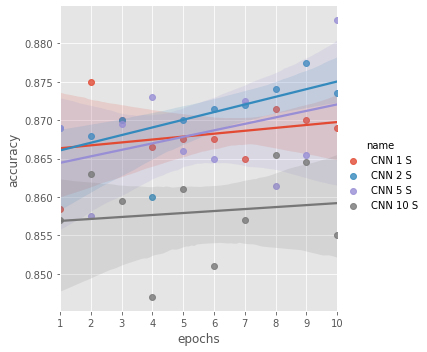

In [59]:
results_3b_1_s  = pd.DataFrame(gen_3b_cnn(model1_s,  'CNN 1 S'), columns=columns_3b)
results_3b_2_s  = pd.DataFrame(gen_3b_cnn(model2_s,  'CNN 2 S'), columns=columns_3b)
results_3b_5_s  = pd.DataFrame(gen_3b_cnn(model5_s,  'CNN 5 S'), columns=columns_3b)
results_3b_10_s = pd.DataFrame(gen_3b_cnn(model10_s, 'CNN 10 S'), columns=columns_3b)

concat_3b_s = pd.concat((results_3b_1_s, results_3b_2_s, results_3b_5_s, results_3b_10_s))
plot_3b(concat_3b_s, '3b/output/cnn_s.svg')

results_3b_1_s.to_csv('3b/output/cnn_1_s.csv')
results_3b_2_s.to_csv('3b/output/cnn_2_s.csv')
results_3b_5_s.to_csv('3b/output/cnn_5_s.csv')
results_3b_10_s.to_csv('3b/output/cnn_10_s.csv')

In [ ]:
concat_3b_all = pd.concat((
    results_3b_1,
    results_3b_2,
    results_3b_5,
    results_3b_10,
    results_3b_1_s,
    results_3b_2_s,
    results_3b_5_s,
    results_3b_10_s,
))

plot_3b(concat_3b_all, '3b/output/concat_all.svg')